In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#df=pd.read_csv(r"C:\Users\ketkand\Documents\assignments\day.csv")
df=pd.read_csv(r"F:\PGDDS\machine_learning_course2\assignment\day.csv")

In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [7]:
# 'instant' column is just the record/row number
# 'dteday' column is irrelevant because we have 'yr' and 'mnth' columns
# casual+registered=cnt hence both these columns are unnecessary
# Hence dropping all these unnecessary columns

df=df.drop(['instant','dteday','casual','registered'], axis=1)

In [8]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


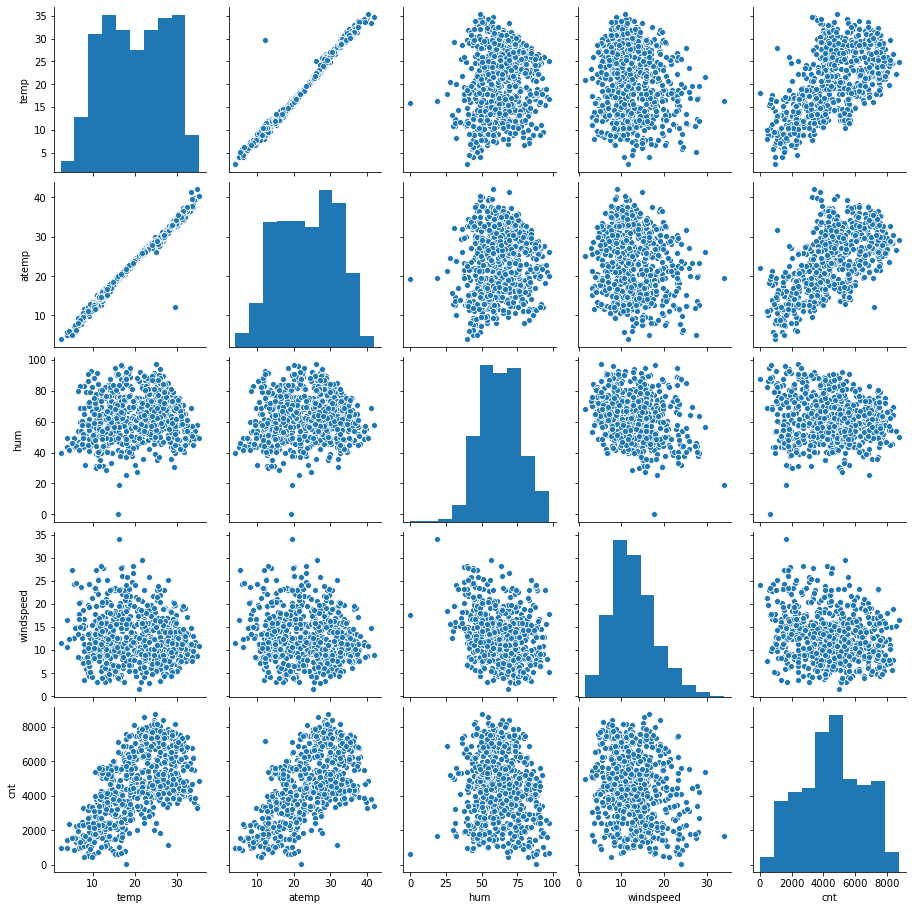

In [9]:
#Visualising numerical columns

numerical_vars=['temp','atemp','hum','windspeed','cnt']

sns.pairplot(df, vars=numerical_vars)
plt.show()

#### From the above pairplot we can surely say that 'temp' and 'atemp' columns are highly corelated
#### ie. they are multicolinear (we will remove it afterwards)

In [10]:
# We can see from the data that season, mnth, weekday and weathersit are the categorical columns 
# but first we need to map it to appropriate values

df[['season']]=df[['season']].apply(lambda x: x.map({1:'spring',2:'summer',3:'fall',4:'winter'}))

df[['mnth']]=df[['mnth']].apply(lambda x: x.map({1:'jan',2:'feb',3:'mar',4:'apr',
                                                 5:'may',6:'jun',7:'jul',8:'aug',
                                                 9:'sept',10:'oct',11:'nov',12:'dec',
                                                }))

df[['weekday']]=df[['weekday']].apply(lambda x: x.map({0:'sunday',1:'monday',2:'tuesday',3:'wednesday',
                                                       4:'thursday',5:'friday',6:'saturday'
                                                      }))

df[['weathersit']]=df[['weathersit']].apply(lambda x: x.map({1:'clear-few_clouds',2:'mist-cloudy',
                                                       3:'light_snow-light_rain-thunderstorm'
                                                      }))

In [11]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,monday,1,mist-cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tuesday,1,mist-cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wednesday,1,clear-few_clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thursday,1,clear-few_clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,friday,1,clear-few_clouds,9.305237,11.46350,43.6957,12.522300,1600


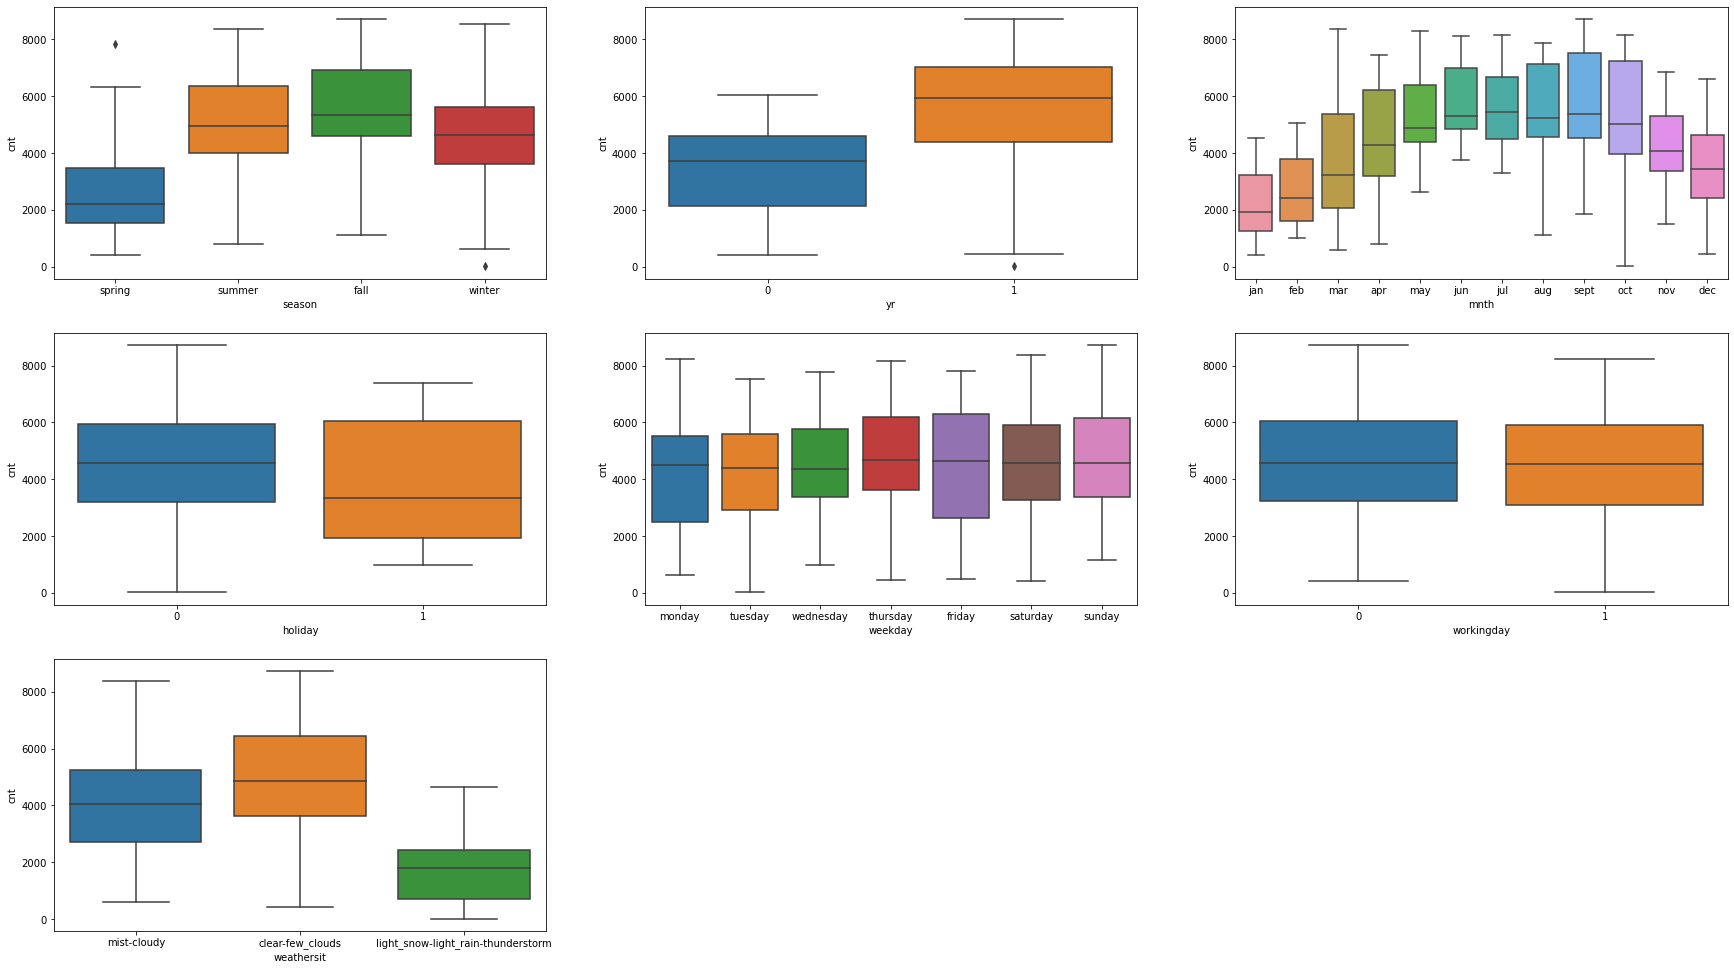

In [12]:
categorical_vars=['season','yr','mnth','holiday','weekday','workingday','weathersit']

#for i in range(len(categorical_vars)):

plt.figure(figsize=(30, 17))
for i in range(len(categorical_vars)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=categorical_vars[i], y='cnt', data=df)
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## DUMMY VARIABLES

In [14]:
# Creating dummy variables for categorical columns

Seasons=pd.get_dummies(df['season'],drop_first=True)
Months=pd.get_dummies(df['mnth'],drop_first=True)
Days=pd.get_dummies(df['weekday'],drop_first=True)
Weather=pd.get_dummies(df['weathersit'],drop_first=True)

In [15]:
df=pd.concat([df,Seasons], axis=1)
df=pd.concat([df,Months], axis=1)
df=pd.concat([df,Days], axis=1)
df=pd.concat([df,Weather], axis=1)

In [16]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow-light_rain-thunderstorm,mist-cloudy
0,spring,0,jan,0,monday,1,mist-cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tuesday,1,mist-cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wednesday,1,clear-few_clouds,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thursday,1,clear-few_clouds,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,friday,1,clear-few_clouds,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Dropping actual columns

df=df.drop(['season','mnth','weekday','weathersit'], axis=1)

In [18]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow-light_rain-thunderstorm,mist-cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


## TRAIN TEST SPLIT

In [19]:
# Now we can split data in train and test

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
print (df_train.shape)
print (df_test.shape)

(510, 30)
(219, 30)


In [20]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow-light_rain-thunderstorm,mist-cloudy
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,1,0,0,0,0,1


## RESCALING

In [21]:
# Scaling numerical columns
scaler=MinMaxScaler()

num_vars=['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [22]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


## MODEL BUILDING

In [23]:
# Creating X and y
y_train = df_train.pop('cnt')
X_train = df_train

In [24]:
# We start with RFE for feature selection and later we will use mixed approach to build a model
# taking 15 variables to start
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [25]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sept', True, 1),
 ('monday', False, 9),
 ('saturday', False, 4),
 ('sunday', False, 5),
 ('thursday', False, 13),
 ('tuesday', False, 8),
 ('wednesday', False, 11),
 ('light_snow-light_rain-thunderstorm', True, 1),
 ('mist-cloudy', True, 1)]

In [26]:
col = list(X_train.columns[rfe.support_])
col

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'spring',
 'summer',
 'winter',
 'dec',
 'jan',
 'jul',
 'nov',
 'sept',
 'light_snow-light_rain-thunderstorm',
 'mist-cloudy']

In [27]:
X_train_rfe = X_train[col]

In [28]:
# add constant
X_train_rfe1 = sm.add_constant(X_train_rfe)

#create and fit model
lrm1 = sm.OLS(y_train,X_train_rfe1).fit()

# params
print(lrm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.34e-189
Time:                        22:50:30   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [29]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
14,mist-cloudy,2.32
0,yr,2.09
11,nov,1.83
9,jan,1.75


In [30]:
# Column hum has very high VIF so we drop it

X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [31]:
# add constant
X_train_rfe1 = sm.add_constant(X_train_rfe)

#create and fit model
lrm2 = sm.OLS(y_train,X_train_rfe1).fit()

# params
print(lrm2.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.57e-186
Time:                        22:50:34   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
10,nov,1.80
8,jan,1.66
9,jul,1.59
13,mist-cloudy,1.56


In [32]:
# Column temp has very VIF so we drop it

X_train_rfe=X_train_rfe.drop(['temp'],axis=1)

In [33]:
# add constant
X_train_rfe1 = sm.add_constant(X_train_rfe)

#create and fit model
lrm3 = sm.OLS(y_train,X_train_rfe1).fit()

# params
print(lrm3.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          5.50e-160
Time:                        22:50:38   Log-Likelihood:                 439.69
No. Observations:                 510   AIC:                            -851.4
Df Residuals:                     496   BIC:                            -792.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

,Features,VIF
2,windspeed,3.88
3,spring,2.89
5,winter,2.84
4,summer,2.01
0,yr,1.83
9,nov,1.79
7,jan,1.64
12,mist-cloudy,1.52
6,dec,1.45
8,jul,1.20


In [34]:
# Column jul has high p-value so we drop it

X_train_rfe=X_train_rfe.drop(['jul'],axis=1)

In [35]:
# add constant
X_train_rfe1 = sm.add_constant(X_train_rfe)

#create and fit model
lrm4 = sm.OLS(y_train,X_train_rfe1).fit()

# params
print(lrm4.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     158.0
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          6.36e-161
Time:                        22:50:43   Log-Likelihood:                 439.28
No. Observations:                 510   AIC:                            -852.6
Df Residuals:                     497   BIC:                            -797.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

,Features,VIF
2,windspeed,3.52
5,winter,2.74
3,spring,2.71
4,summer,1.86
8,nov,1.79
0,yr,1.77
7,jan,1.64
11,mist-cloudy,1.52
6,dec,1.45
9,sept,1.16


In [36]:
# Column winter has high p-value so we drop it

X_train_rfe=X_train_rfe.drop(['winter'],axis=1)

In [37]:
# add constant
X_train_rfe1 = sm.add_constant(X_train_rfe)

#create and fit model
lrm5 = sm.OLS(y_train,X_train_rfe1).fit()

# params
print(lrm5.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     172.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          7.42e-162
Time:                        22:50:47   Log-Likelihood:                 438.82
No. Observations:                 510   AIC:                            -853.6
Df Residuals:                     498   BIC:                            -802.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

,Features,VIF
2,windspeed,3.22
3,spring,2.36
0,yr,1.74
4,summer,1.69
6,jan,1.62
10,mist-cloudy,1.47
7,nov,1.23
8,sept,1.16
5,dec,1.13
1,holiday,1.06


In [38]:
# Adding month feb to check if model performs better

X_train_rfe['feb']=X_train['feb']

In [39]:
# add constant
X_train_rfe1 = sm.add_constant(X_train_rfe)

#create and fit model
lrm6 = sm.OLS(y_train,X_train_rfe1).fit()

# params
print(lrm6.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     165.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          9.74e-165
Time:                        22:50:51   Log-Likelihood:                 448.34
No. Observations:                 510   AIC:                            -870.7
Df Residuals:                     497   BIC:                            -815.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

,Features,VIF
3,spring,3.63
2,windspeed,3.22
6,jan,2.13
11,feb,1.84
0,yr,1.74
4,summer,1.69
10,mist-cloudy,1.48
7,nov,1.23
5,dec,1.18
8,sept,1.16


In [40]:
# Adding column workingday to check if model performs better

X_train_rfe['workingday']=X_train['workingday']

In [41]:
# add constant
X_train_rfe1 = sm.add_constant(X_train_rfe)

#create and fit model
lrm7 = sm.OLS(y_train,X_train_rfe1).fit()

# params
print(lrm7.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     154.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          9.87e-165
Time:                        22:50:55   Log-Likelihood:                 450.99
No. Observations:                 510   AIC:                            -874.0
Df Residuals:                     496   BIC:                            -814.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

,Features,VIF
2,windspeed,3.72
3,spring,3.64
12,workingday,2.73
6,jan,2.14
11,feb,1.85
0,yr,1.82
4,summer,1.76
10,mist-cloudy,1.48
7,nov,1.28
5,dec,1.20


In [42]:
# Adding column saturday to check if model performs better

X_train_rfe['saturday']=X_train['saturday']

In [43]:
# add constant
X_train_rfe1 = sm.add_constant(X_train_rfe)

#create and fit model
lrm8 = sm.OLS(y_train,X_train_rfe1).fit()

# params
print(lrm8.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     142.9
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.24e-163
Time:                        22:51:00   Log-Likelihood:                 451.00
No. Observations:                 510   AIC:                            -872.0
Df Residuals:                     495   BIC:                            -808.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

,Features,VIF
2,windspeed,4.01
3,spring,3.66
12,workingday,3.47
6,jan,2.14
0,yr,1.86
11,feb,1.85
4,summer,1.80
10,mist-cloudy,1.50
13,saturday,1.44
7,nov,1.31


In [44]:
# Column saturday has high p-value so we drop it

X_train_rfe=X_train_rfe.drop(['saturday'],axis=1)

In [45]:
# add constant
X_train_rfe1 = sm.add_constant(X_train_rfe)

#create and fit model
lrm9 = sm.OLS(y_train,X_train_rfe1).fit()

# params
print(lrm9.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     154.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          9.87e-165
Time:                        22:51:05   Log-Likelihood:                 450.99
No. Observations:                 510   AIC:                            -874.0
Df Residuals:                     496   BIC:                            -814.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

,Features,VIF
2,windspeed,3.72
3,spring,3.64
12,workingday,2.73
6,jan,2.14
11,feb,1.85
0,yr,1.82
4,summer,1.76
10,mist-cloudy,1.48
7,nov,1.28
5,dec,1.20


In [46]:
# Adding column saturday to check if model performs better

X_train_rfe['sunday']=X_train['sunday']

In [47]:
# add constant
X_train_rfe1 = sm.add_constant(X_train_rfe)

#create and fit model
lrm10 = sm.OLS(y_train,X_train_rfe1).fit()

# params
print(lrm10.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     142.9
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.25e-163
Time:                        22:51:09   Log-Likelihood:                 450.99
No. Observations:                 510   AIC:                            -872.0
Df Residuals:                     495   BIC:                            -808.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

,Features,VIF
2,windspeed,4.15
3,spring,3.64
12,workingday,3.61
6,jan,2.14
0,yr,1.88
11,feb,1.85
4,summer,1.78
13,sunday,1.53
10,mist-cloudy,1.51
7,nov,1.29


In [48]:
# Column sunday has high p-value so we drop it

X_train_rfe=X_train_rfe.drop(['sunday'],axis=1)

In [49]:
# add constant
X_train_rfe1 = sm.add_constant(X_train_rfe)

#create and fit model
lrm11 = sm.OLS(y_train,X_train_rfe1).fit()

# params
print(lrm11.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     154.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          9.87e-165
Time:                        22:51:15   Log-Likelihood:                 450.99
No. Observations:                 510   AIC:                            -874.0
Df Residuals:                     496   BIC:                            -814.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

,Features,VIF
2,windspeed,3.72
3,spring,3.64
12,workingday,2.73
6,jan,2.14
11,feb,1.85
0,yr,1.82
4,summer,1.76
10,mist-cloudy,1.48
7,nov,1.28
5,dec,1.20


## RESIDUAL ANALYSIS

In [50]:
y_train_pred=lrm11.predict(X_train_rfe1)

In [51]:
res = y_train-y_train_pred

Text(0.5, 0, 'Errors')

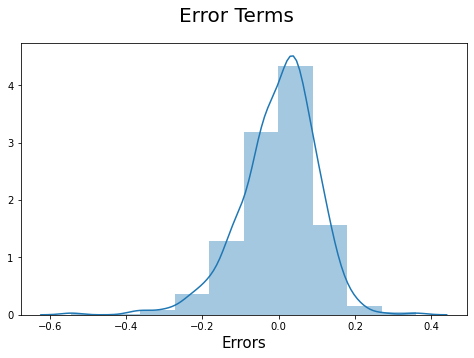

In [52]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(8,5))
sns.distplot((res), bins=10)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=15) 

## MAKING PREDICTIONS

In [53]:
num_vars=['temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [54]:
y_test = df_test.pop('cnt')
X_test = df_test

In [55]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,...,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow-light_rain-thunderstorm,mist-cloudy
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,...,0,0,0,0,0,1,0,0,0,0
299,1.0,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,...,1,0,0,1,0,0,0,0,0,1
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,...,0,0,0,1,0,0,0,0,0,0


In [56]:
req_cols=['const','yr','holiday','windspeed','spring','summer','dec','jan','nov','sept','light_snow-light_rain-thunderstorm','mist-cloudy','feb','workingday']

In [57]:
X_test_sm=X_test_sm[req_cols]

#### Prediction on test data

In [58]:
y_test_pred=lrm11.predict(X_test_sm)

#### Evaluating model on test data

In [59]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7878432219880742

##### r2_score that we got from the test data is close to the r2_score of train data.                                   
##### So we can say that, what model has learned from training data it is pretty much able to
##### generalise on test data

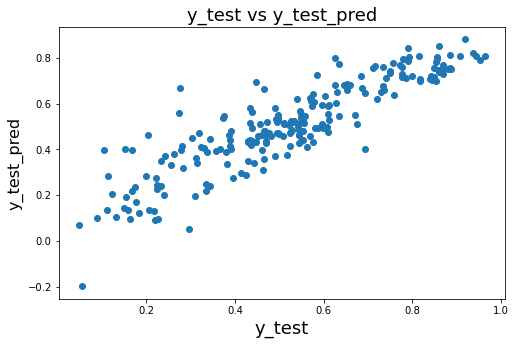

In [60]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_test_pred)
plt.title('y_test vs y_test_pred', fontsize=18)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

### Our model seems good enough to predict values because the actual and the predicted values of 'cnt' are almost overlapping and pretty much follow good linear relation

In [61]:
lrm11.params

const                                 0.604985
yr                                    0.245175
holiday                              -0.096765
windspeed                            -0.192242
spring                               -0.193847
summer                               -0.041428
dec                                  -0.133625
jan                                  -0.167737
nov                                  -0.111741
sept                                  0.056552
light_snow-light_rain-thunderstorm   -0.315603
mist-cloudy                          -0.089025
feb                                  -0.101564
workingday                           -0.023458
dtype: float64

###### Hence equation of our best fitted line is

###### cnt = 0.6049 + 0.2451 X yr - 0.0967 X holiday - 0.1922 X windspeed - 0.1938 X spring - 0.0414 X summer - 0.1336 X dec - 0.1677 X jan - 0.1117 nov + 0.0565 X sept - 0.3156 X light_snow-light_rain-thunderstorm - 0.0890 X mist-cloudy - 0.1015 X feb - 0.0234 X workingday

##### All the positive coefficients indicates that increase in these values leads to increase in cnt                             
##### All the negative coefficients indicates that increase in these values leads to decrease in cnt

#### Inferences

#### 1. Demand decreases if it is holiday, summer or light_snow, light_rain
#### 2. Demand is high in the month os september
#### 3. Even on workingday demand falls to some extent